<a href="https://colab.research.google.com/github/maithil06/IndianFoodAnalysis/blob/main/Indian_Famous_Food_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [579]:
pip install plotly

In [580]:
pip install chart_studio

In [581]:
pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl


In [582]:
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [583]:
df=pd.read_csv('indian_food.csv')

In [584]:
df

name  ...      region
0                      Balu shahi  ...        East
1                          Boondi  ...        West
2                  Gajar ka halwa  ...       North
3                          Ghevar  ...        West
4                     Gulab jamun  ...        East
5                          Imarti  ...        East
6                          Jalebi  ...       North
7                      Kaju katli  ...          -1
8                        Kalakand  ...        East
9                           Kheer  ...          -1
10                          Laddu  ...          -1
11                          Lassi  ...       North
12                      Nankhatai  ...          -1
13                          Petha  ...       North
14                         Phirni  ...        East
15                          Rabri  ...       North
16                         Sheera  ...        West
17                        Singori  ...       North
18                    Sohan halwa  ...       North
19                    Sohan papdi  ...        West
20                  Chhena jalebi  ...        East
21                  Chhena kheeri  ...        East
22                    Chhena poda  ...        East
23                      Cham cham  ...        East
24                    Kheer sagar  ...        East
25                       Ledikeni  ...        East
26                       Lyangcha  ...  North East
27                        Malapua  ...       North
28                       Mihidana  ...        East
29                      Misti doi  ...        East
30                         Pantua  ...        East
31                          Pithe  ...  North East
32                       Rasabali  ...        East
33                      Ras malai  ...        East
34                       Rasgulla  ...        East
35                        Sandesh  ...        East
36                      Adhirasam  ...        East
37                        Ariselu  ...       South
38                   Bandar laddu  ...       South
39                         Chikki  ...        West
40                  Dharwad pedha  ...       South
41               Double ka meetha  ...       South
42                        Gavvalu  ...       South
43                 Kakinada khaja  ...       South
44                Kuzhi paniyaram  ...       South
45                     Mysore pak  ...       South
46                 Obbattu holige  ...       South
47                  Palathalikalu  ...       South
48                       Poornalu  ...       South
49                         Pongal  ...       South
50                   Pootharekulu  ...       South
51               Qubani ka meetha  ...       South
52                    Sheer korma  ...       South
53                     Unni Appam  ...       South
54                      Kajjikaya  ...       South
55                         Anarsa  ...        West
56                        Basundi  ...        West
57                        Dhondas  ...        West
58                       Doodhpak  ...        West
59                    Mahim halwa  ...        West
60                          Modak  ...        West
61                    Shankarpali  ...        West
62                      Shrikhand  ...        West
63                     Sutar feni  ...        West
64                     Maach Jhol  ...  North East
65                    Pork Bharta  ...  North East
66                 Chak Hao Kheer  ...  North East
67                          Galho  ...  North East
68                      Aloo gobi  ...       North
69                     Aloo tikki  ...       North
70                     Aloo matar  ...       North
71                     Aloo methi  ...       North
72              Aloo shimla mirch  ...       North
73                        Bhatura  ...       North
74                  Bhindi masala  ...       North
75                        Biryani  ...       South
76                 Butter chicken  ...       North
77                   Chana masala  ...       North


In [585]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

We can see that region has a missing value, so let us fill it with the most occuring value in region feature.

In [586]:
df.region.value_counts()

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

Here we also noticed something that most of the values are not related region so we also fill that with West as its odds are more.

In [587]:
df = df.fillna(df['region'].value_counts().index[0])

In [588]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [589]:
df.region.map({'-1':'West'})

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7      West
8       NaN
9      West
10     West
11      NaN
12     West
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83  

In [590]:
df.region.value_counts()

West          75
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

As we see here, the one value which was missing in region column, I assigned it to west so total count of western region changed to 75 from 74.

In [591]:
df.region.replace(['West', 'East','Central','North','South','North East','-1'], ['West', 'East','Central','North','South','North East','West'], inplace=True)

In [592]:
df.region.value_counts()

West          88
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

Now here we see, the west value counts increased to 88 from 75 and here we complete data cleaning and wrangling of region column, now lets move towrads next feature!!

In [593]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [594]:
df.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

The feature values seem correct and no inappropriate values found and all values are present in this diet series so lets move to next feature.

In [595]:
df.prep_time.value_counts()

 10     98
 20     40
-1      30
 15     22
 5      16
 30     12
 25      5
 45      5
 120     5
 240     4
 40      3
 360     3
 60      2
 180     2
 80      1
 70      1
 35      1
 150     1
 12      1
 480     1
 495     1
 500     1
Name: prep_time, dtype: int64

The person who created this dataset clealry stated that -1 in any column means that is a NAN values and here also we have many nan values, like around 30.

Non-vegeterian foods take a little longer time to cook so if a non-veg food has a NAN value, we will fill it with a higher time lets say 180 minutes.

In [596]:
pd.set_option('display.max_rows', 500)

The next steps will be little complicated to understand as I'm extracting and modifying values

In [597]:
df

name  ...      region
0                      Balu shahi  ...        East
1                          Boondi  ...        West
2                  Gajar ka halwa  ...       North
3                          Ghevar  ...        West
4                     Gulab jamun  ...        East
5                          Imarti  ...        East
6                          Jalebi  ...       North
7                      Kaju katli  ...        West
8                        Kalakand  ...        East
9                           Kheer  ...        West
10                          Laddu  ...        West
11                          Lassi  ...       North
12                      Nankhatai  ...        West
13                          Petha  ...       North
14                         Phirni  ...        East
15                          Rabri  ...       North
16                         Sheera  ...        West
17                        Singori  ...       North
18                    Sohan halwa  ...       North
19                    Sohan papdi  ...        West
20                  Chhena jalebi  ...        East
21                  Chhena kheeri  ...        East
22                    Chhena poda  ...        East
23                      Cham cham  ...        East
24                    Kheer sagar  ...        East
25                       Ledikeni  ...        East
26                       Lyangcha  ...  North East
27                        Malapua  ...       North
28                       Mihidana  ...        East
29                      Misti doi  ...        East
30                         Pantua  ...        East
31                          Pithe  ...  North East
32                       Rasabali  ...        East
33                      Ras malai  ...        East
34                       Rasgulla  ...        East
35                        Sandesh  ...        East
36                      Adhirasam  ...        East
37                        Ariselu  ...       South
38                   Bandar laddu  ...       South
39                         Chikki  ...        West
40                  Dharwad pedha  ...       South
41               Double ka meetha  ...       South
42                        Gavvalu  ...       South
43                 Kakinada khaja  ...       South
44                Kuzhi paniyaram  ...       South
45                     Mysore pak  ...       South
46                 Obbattu holige  ...       South
47                  Palathalikalu  ...       South
48                       Poornalu  ...       South
49                         Pongal  ...       South
50                   Pootharekulu  ...       South
51               Qubani ka meetha  ...       South
52                    Sheer korma  ...       South
53                     Unni Appam  ...       South
54                      Kajjikaya  ...       South
55                         Anarsa  ...        West
56                        Basundi  ...        West
57                        Dhondas  ...        West
58                       Doodhpak  ...        West
59                    Mahim halwa  ...        West
60                          Modak  ...        West
61                    Shankarpali  ...        West
62                      Shrikhand  ...        West
63                     Sutar feni  ...        West
64                     Maach Jhol  ...  North East
65                    Pork Bharta  ...  North East
66                 Chak Hao Kheer  ...  North East
67                          Galho  ...  North East
68                      Aloo gobi  ...       North
69                     Aloo tikki  ...       North
70                     Aloo matar  ...       North
71                     Aloo methi  ...       North
72              Aloo shimla mirch  ...       North
73                        Bhatura  ...       North
74                  Bhindi masala  ...       North
75                        Biryani  ...       South
76                 Butter chicken  ...       North
77                   Chana masala  ...       North


In [598]:
df['Total_time']=df.prep_time+df.cook_time

In [599]:
dd=df[df['diet']=='vegetarian']

In [600]:
dd

name  ... Total_time
0                      Balu shahi  ...         70
1                          Boondi  ...        110
2                  Gajar ka halwa  ...         75
3                          Ghevar  ...         45
4                     Gulab jamun  ...         55
5                          Imarti  ...         60
6                          Jalebi  ...         60
7                      Kaju katli  ...         30
8                        Kalakand  ...         50
9                           Kheer  ...         50
10                          Laddu  ...         50
11                          Lassi  ...         10
12                      Nankhatai  ...         50
13                          Petha  ...         40
14                         Phirni  ...         50
15                          Rabri  ...         55
16                         Sheera  ...         35
17                        Singori  ...         30
18                    Sohan halwa  ...         70
19                    Sohan papdi  ...         59
20                  Chhena jalebi  ...         60
21                  Chhena kheeri  ...         59
22                    Chhena poda  ...         55
23                      Cham cham  ...        100
24                    Kheer sagar  ...         85
25                       Ledikeni  ...         90
26                       Lyangcha  ...         50
27                        Malapua  ...        130
28                       Mihidana  ...         45
29                      Misti doi  ...        510
30                         Pantua  ...         90
31                          Pithe  ...         50
32                       Rasabali  ...         45
33                      Ras malai  ...        240
34                       Rasgulla  ...        100
35                        Sandesh  ...         50
36                      Adhirasam  ...         60
37                        Ariselu  ...         90
38                   Bandar laddu  ...         40
39                         Chikki  ...         30
40                  Dharwad pedha  ...         80
41               Double ka meetha  ...         50
42                        Gavvalu  ...         40
43                 Kakinada khaja  ...         40
44                Kuzhi paniyaram  ...         30
45                     Mysore pak  ...         25
46                 Obbattu holige  ...        240
47                  Palathalikalu  ...         35
48                       Poornalu  ...        300
49                         Pongal  ...         25
50                   Pootharekulu  ...         70
51               Qubani ka meetha  ...         30
52                    Sheer korma  ...         30
53                     Unni Appam  ...         30
54                      Kajjikaya  ...         55
55                         Anarsa  ...         60
56                        Basundi  ...         45
57                        Dhondas  ...         60
58                       Doodhpak  ...         70
59                    Mahim halwa  ...         35
60                          Modak  ...         25
61                    Shankarpali  ...         45
62                      Shrikhand  ...        730
63                     Sutar feni  ...         70
66                 Chak Hao Kheer  ...        285
68                      Aloo gobi  ...         30
69                     Aloo tikki  ...         25
70                     Aloo matar  ...         45
71                     Aloo methi  ...         50
72              Aloo shimla mirch  ...         50
73                        Bhatura  ...         40
74                  Bhindi masala  ...         50
77                   Chana masala  ...         50
78                        Chapati  ...         20
82                  Chole bhature  ...         50
83              Daal baati churma  ...        100
84                      Daal puri  ...         60
85                   Dal makhani   ...         70
86                      Dal tadka  ...         40
87                       Dum 

In [601]:
dd.Total_time.value_counts().sum()

226

In [602]:
dd.Total_time.sum()/226

67.26548672566372

Here we see the average as nearly to 70 minutes but there are many -1 values which are NAN values acoording to the data scrapper.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

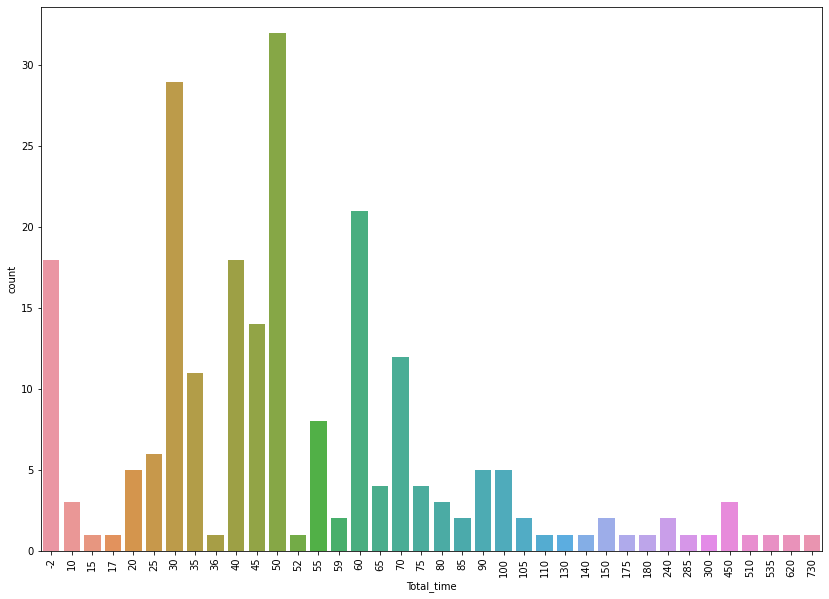

In [603]:
plt.figure(figsize=(14,10))
sns.countplot(x=dd.Total_time)
plt.xticks(rotation=90)

(array([0.0108806 , 0.00181343, 0.00120896, 0.00664926, 0.01752986,
        0.01813434, 0.00846269, 0.0247836 , 0.01390299, 0.00967165,
        0.00241791, 0.00302239, 0.00302239, 0.00302239, 0.00120896,
        0.00060448, 0.        , 0.        , 0.00060448, 0.00060448,
        0.00120896, 0.        , 0.        , 0.        , 0.00120896,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00120896, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00060448,
        0.        , 0.00060448, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00181343, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00060448,
        0.        , 0.        , 0.        , 0.00

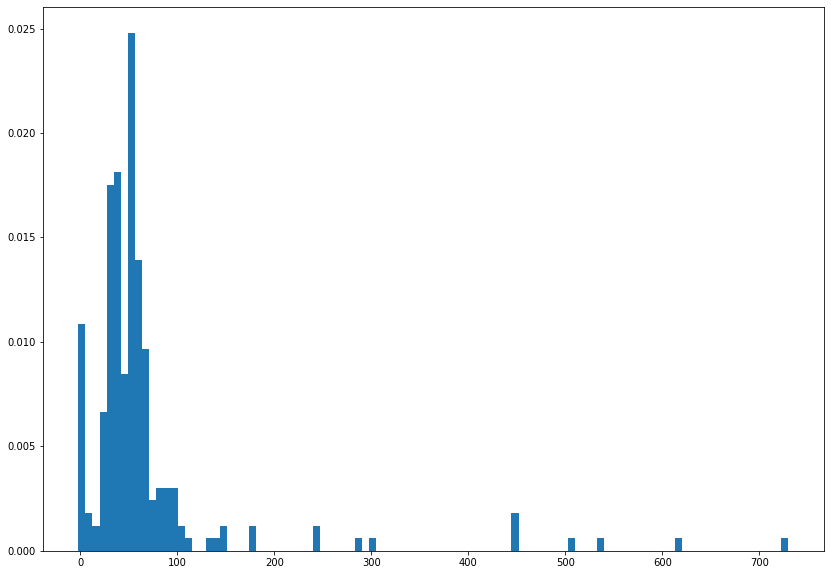

In [604]:
plt.figure(figsize=(14,10))
plt.hist(x=dd.Total_time,bins=100,density=True)

This is a Left Skewwed data as we can clearly see in the above graph and the outliers are clearly potryaed.
Here the outliers are the Total time exceeding 120+ minutes, but for EDA we will consider the outliers too because this domain, we can't neglect the exotic dishes.

The average of vegetarian total time is approx 100 minutes so lets fill features with it.

In [605]:
df1=df[df['diet']=='vegetarian']

Here I have extracted column of diet with vegetarians as the only value.

In [606]:
df2=df[df['diet']=='non vegetarian']

Here I have extracted column of diet with only non vegetarians value.

In [607]:
d_under_modification=df1[df1['prep_time']==-1]

In [608]:
d_under_modification

name  ... Total_time
19      Sohan papdi  ...         59
21    Chhena kheeri  ...         59
132  Kaara kozhambu  ...         -2
134  Keerai masiyal  ...         -2
148      Paravannam  ...         -2
152         Poriyal  ...         -2
185        Ghooghra  ...         -2
187        Halvasan  ...         -2
213      Mag Dhokli  ...         -2
216      Farsi Puri  ...         -2
220      Cheera Doi  ...         -2
227  Bengena Pitika  ...         -2
230      Bora Sawul  ...         -2
234      Hando Guri  ...         -2
238         Khorisa  ...         -2
244         Pakhala  ...         -2
246          Payokh  ...         -2
248        Red Rice  ...         -2
252          Shufta  ...         -2
254          Pinaca  ...         -2

[20 rows x 10 columns]

Here I have extracted the data from the only vegetarian values containg -1 values.

In [609]:
d_modification=d_under_modification.prep_time.replace({-1:30})

In [610]:
d_modification

19     30
21     30
132    30
134    30
148    30
152    30
185    30
187    30
213    30
216    30
220    30
227    30
230    30
234    30
238    30
244    30
246    30
248    30
252    30
254    30
Name: prep_time, dtype: int64

And here lastly I change the -1 values in in vegetarian dataframe to 30 in prep_time and I will also add 30 to cook_time so total_time makes up to 60 as potrayed eariler in this notebook.

In [611]:
d_under_modification.drop(['prep_time'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [612]:
d_under_modification['prep_time']=d_modification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [613]:
d_under_modification

name  ... prep_time
19      Sohan papdi  ...        30
21    Chhena kheeri  ...        30
132  Kaara kozhambu  ...        30
134  Keerai masiyal  ...        30
148      Paravannam  ...        30
152         Poriyal  ...        30
185        Ghooghra  ...        30
187        Halvasan  ...        30
213      Mag Dhokli  ...        30
216      Farsi Puri  ...        30
220      Cheera Doi  ...        30
227  Bengena Pitika  ...        30
230      Bora Sawul  ...        30
234      Hando Guri  ...        30
238         Khorisa  ...        30
244         Pakhala  ...        30
246          Payokh  ...        30
248        Red Rice  ...        30
252          Shufta  ...        30
254          Pinaca  ...        30

[20 rows x 10 columns]

In [614]:
df=df[df['prep_time']!=-1]

Here I dropped the -1 values in main dataframe so that i can add the modified values.

In [615]:
df=pd.concat([df,d_under_modification])

Here i merge both the dataframe and we have modified the vegeterians value but not the non vegetarian values



In [616]:
df

name  ... Total_time
0                      Balu shahi  ...         70
1                          Boondi  ...        110
2                  Gajar ka halwa  ...         75
3                          Ghevar  ...         45
4                     Gulab jamun  ...         55
5                          Imarti  ...         60
6                          Jalebi  ...         60
7                      Kaju katli  ...         30
8                        Kalakand  ...         50
9                           Kheer  ...         50
10                          Laddu  ...         50
11                          Lassi  ...         10
12                      Nankhatai  ...         50
13                          Petha  ...         40
14                         Phirni  ...         50
15                          Rabri  ...         55
16                         Sheera  ...         35
17                        Singori  ...         30
18                    Sohan halwa  ...         70
20                  Chhena jalebi  ...         60
22                    Chhena poda  ...         55
23                      Cham cham  ...        100
24                    Kheer sagar  ...         85
25                       Ledikeni  ...         90
26                       Lyangcha  ...         50
27                        Malapua  ...        130
28                       Mihidana  ...         45
29                      Misti doi  ...        510
30                         Pantua  ...         90
31                          Pithe  ...         50
32                       Rasabali  ...         45
33                      Ras malai  ...        240
34                       Rasgulla  ...        100
35                        Sandesh  ...         50
36                      Adhirasam  ...         60
37                        Ariselu  ...         90
38                   Bandar laddu  ...         40
39                         Chikki  ...         30
40                  Dharwad pedha  ...         80
41               Double ka meetha  ...         50
42                        Gavvalu  ...         40
43                 Kakinada khaja  ...         40
44                Kuzhi paniyaram  ...         30
45                     Mysore pak  ...         25
46                 Obbattu holige  ...        240
47                  Palathalikalu  ...         35
48                       Poornalu  ...        300
49                         Pongal  ...         25
50                   Pootharekulu  ...         70
51               Qubani ka meetha  ...         30
52                    Sheer korma  ...         30
53                     Unni Appam  ...         30
54                      Kajjikaya  ...         55
55                         Anarsa  ...         60
56                        Basundi  ...         45
57                        Dhondas  ...         60
58                       Doodhpak  ...         70
59                    Mahim halwa  ...         35
60                          Modak  ...         25
61                    Shankarpali  ...         45
62                      Shrikhand  ...        730
63                     Sutar feni  ...         70
64                     Maach Jhol  ...         50
66                 Chak Hao Kheer  ...        285
67                          Galho  ...         20
68                      Aloo gobi  ...         30
69                     Aloo tikki  ...         25
70                     Aloo matar  ...         45
71                     Aloo methi  ...         50
72              Aloo shimla mirch  ...         50
73                        Bhatura  ...         40
74                  Bhindi masala  ...         50
75                        Biryani  ...        150
76                 Butter chicken  ...         45
77                   Chana masala  ...         50
78                        Chapati  ...         20
79                 Chicken razala  ...         45
80           Chicken Tikka masala  ...         60
81                  Chicken Tikka  ...        165
82                  Chole bha

In [617]:
df.prep_time.value_counts().sum()

245

We know that we have total of 255 values, the 10 values missing are the 10 values of -1 in non vegetarian column.

In [618]:
non_veg_prep_time_missing=df2[df2['prep_time']==-1]

Here we can see that 10 values are missing because they are -1 values in prep_time feature with respect to non vegetarian diet so now lets work on it.

In [619]:
non_veg_prep_time_missing.replace({-1:45},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [620]:
non_veg_prep_time_missing

name  ... Total_time
65      Pork Bharta  ...         -2
167     Kolim Jawla  ...         -2
172      Bombil fry  ...         -2
223     Kumol Sawul  ...         -2
229      Black rice  ...         -2
237        Kabiraji  ...         -2
239  Koldil Chicken  ...         -2
240       Konir Dom  ...         -2
241     Koldil Duck  ...         -2
242      Masor Koni  ...         -2

[10 rows x 10 columns]

In [621]:
df=pd.concat([df,non_veg_prep_time_missing])

In [622]:
df

name  ... Total_time
0                      Balu shahi  ...         70
1                          Boondi  ...        110
2                  Gajar ka halwa  ...         75
3                          Ghevar  ...         45
4                     Gulab jamun  ...         55
5                          Imarti  ...         60
6                          Jalebi  ...         60
7                      Kaju katli  ...         30
8                        Kalakand  ...         50
9                           Kheer  ...         50
10                          Laddu  ...         50
11                          Lassi  ...         10
12                      Nankhatai  ...         50
13                          Petha  ...         40
14                         Phirni  ...         50
15                          Rabri  ...         55
16                         Sheera  ...         35
17                        Singori  ...         30
18                    Sohan halwa  ...         70
20                  Chhena jalebi  ...         60
22                    Chhena poda  ...         55
23                      Cham cham  ...        100
24                    Kheer sagar  ...         85
25                       Ledikeni  ...         90
26                       Lyangcha  ...         50
27                        Malapua  ...        130
28                       Mihidana  ...         45
29                      Misti doi  ...        510
30                         Pantua  ...         90
31                          Pithe  ...         50
32                       Rasabali  ...         45
33                      Ras malai  ...        240
34                       Rasgulla  ...        100
35                        Sandesh  ...         50
36                      Adhirasam  ...         60
37                        Ariselu  ...         90
38                   Bandar laddu  ...         40
39                         Chikki  ...         30
40                  Dharwad pedha  ...         80
41               Double ka meetha  ...         50
42                        Gavvalu  ...         40
43                 Kakinada khaja  ...         40
44                Kuzhi paniyaram  ...         30
45                     Mysore pak  ...         25
46                 Obbattu holige  ...        240
47                  Palathalikalu  ...         35
48                       Poornalu  ...        300
49                         Pongal  ...         25
50                   Pootharekulu  ...         70
51               Qubani ka meetha  ...         30
52                    Sheer korma  ...         30
53                     Unni Appam  ...         30
54                      Kajjikaya  ...         55
55                         Anarsa  ...         60
56                        Basundi  ...         45
57                        Dhondas  ...         60
58                       Doodhpak  ...         70
59                    Mahim halwa  ...         35
60                          Modak  ...         25
61                    Shankarpali  ...         45
62                      Shrikhand  ...        730
63                     Sutar feni  ...         70
64                     Maach Jhol  ...         50
66                 Chak Hao Kheer  ...        285
67                          Galho  ...         20
68                      Aloo gobi  ...         30
69                     Aloo tikki  ...         25
70                     Aloo matar  ...         45
71                     Aloo methi  ...         50
72              Aloo shimla mirch  ...         50
73                        Bhatura  ...         40
74                  Bhindi masala  ...         50
75                        Biryani  ...        150
76                 Butter chicken  ...         45
77                   Chana masala  ...         50
78                        Chapati  ...         20
79                 Chicken razala  ...         45
80           Chicken Tikka masala  ...         60
81                  Chicken Tikka  ...        165
82                  Chole bha

In [623]:
df.prep_time.value_counts().sum()

255

So here we cleaned all values of prep time so lets move forward to next feature cook_time

In [624]:
df.reset_index()

index                          name  ...      region Total_time
0        0                    Balu shahi  ...        East         70
1        1                        Boondi  ...        West        110
2        2                Gajar ka halwa  ...       North         75
3        3                        Ghevar  ...        West         45
4        4                   Gulab jamun  ...        East         55
5        5                        Imarti  ...        East         60
6        6                        Jalebi  ...       North         60
7        7                    Kaju katli  ...        West         30
8        8                      Kalakand  ...        East         50
9        9                         Kheer  ...        West         50
10      10                         Laddu  ...        West         50
11      11                         Lassi  ...       North         10
12      12                     Nankhatai  ...        West         50
13      13                         Petha  ...       North         40
14      14                        Phirni  ...        East         50
15      15                         Rabri  ...       North         55
16      16                        Sheera  ...        West         35
17      17                       Singori  ...       North         30
18      18                   Sohan halwa  ...       North         70
19      20                 Chhena jalebi  ...        East         60
20      22                   Chhena poda  ...        East         55
21      23                     Cham cham  ...        East        100
22      24                   Kheer sagar  ...        East         85
23      25                      Ledikeni  ...        East         90
24      26                      Lyangcha  ...  North East         50
25      27                       Malapua  ...       North        130
26      28                      Mihidana  ...        East         45
27      29                     Misti doi  ...        East        510
28      30                        Pantua  ...        East         90
29      31                         Pithe  ...  North East         50
30      32                      Rasabali  ...        East         45
31      33                     Ras malai  ...        East        240
32      34                      Rasgulla  ...        East        100
33      35                       Sandesh  ...        East         50
34      36                     Adhirasam  ...        East         60
35      37                       Ariselu  ...       South         90
36      38                  Bandar laddu  ...       South         40
37      39                        Chikki  ...        West         30
38      40                 Dharwad pedha  ...       South         80
39      41              Double ka meetha  ...       South         50
40      42                       Gavvalu  ...       South         40
41      43                Kakinada khaja  ...       South         40
42      44               Kuzhi paniyaram  ...       South         30
43      45                    Mysore pak  ...       South         25
44      46                Obbattu holige  ...       South        240
45      47                 Palathalikalu  ...       South         35
46      48                      Poornalu  ...       South        300
47      49                        Pongal  ...       South         25
48      50                  Pootharekulu  ...       South         70
49      51              Qubani ka meetha  ...       South         30
50      52                   Sheer korma  ...       South         30
51      53                    Unni Appam  ...       South         30
52      54                     Kajjikaya  ...       South         55
53      55                        Anarsa  ...        West         60
54      56                       Basundi  ...        West         45
55      57                       Dhondas  ...        West         60
56      58                      Doodhpak  ...        West         70
57 

In [625]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'Total_time'],
      dtype='object')

In [626]:
df

name  ... Total_time
0                      Balu shahi  ...         70
1                          Boondi  ...        110
2                  Gajar ka halwa  ...         75
3                          Ghevar  ...         45
4                     Gulab jamun  ...         55
5                          Imarti  ...         60
6                          Jalebi  ...         60
7                      Kaju katli  ...         30
8                        Kalakand  ...         50
9                           Kheer  ...         50
10                          Laddu  ...         50
11                          Lassi  ...         10
12                      Nankhatai  ...         50
13                          Petha  ...         40
14                         Phirni  ...         50
15                          Rabri  ...         55
16                         Sheera  ...         35
17                        Singori  ...         30
18                    Sohan halwa  ...         70
20                  Chhena jalebi  ...         60
22                    Chhena poda  ...         55
23                      Cham cham  ...        100
24                    Kheer sagar  ...         85
25                       Ledikeni  ...         90
26                       Lyangcha  ...         50
27                        Malapua  ...        130
28                       Mihidana  ...         45
29                      Misti doi  ...        510
30                         Pantua  ...         90
31                          Pithe  ...         50
32                       Rasabali  ...         45
33                      Ras malai  ...        240
34                       Rasgulla  ...        100
35                        Sandesh  ...         50
36                      Adhirasam  ...         60
37                        Ariselu  ...         90
38                   Bandar laddu  ...         40
39                         Chikki  ...         30
40                  Dharwad pedha  ...         80
41               Double ka meetha  ...         50
42                        Gavvalu  ...         40
43                 Kakinada khaja  ...         40
44                Kuzhi paniyaram  ...         30
45                     Mysore pak  ...         25
46                 Obbattu holige  ...        240
47                  Palathalikalu  ...         35
48                       Poornalu  ...        300
49                         Pongal  ...         25
50                   Pootharekulu  ...         70
51               Qubani ka meetha  ...         30
52                    Sheer korma  ...         30
53                     Unni Appam  ...         30
54                      Kajjikaya  ...         55
55                         Anarsa  ...         60
56                        Basundi  ...         45
57                        Dhondas  ...         60
58                       Doodhpak  ...         70
59                    Mahim halwa  ...         35
60                          Modak  ...         25
61                    Shankarpali  ...         45
62                      Shrikhand  ...        730
63                     Sutar feni  ...         70
64                     Maach Jhol  ...         50
66                 Chak Hao Kheer  ...        285
67                          Galho  ...         20
68                      Aloo gobi  ...         30
69                     Aloo tikki  ...         25
70                     Aloo matar  ...         45
71                     Aloo methi  ...         50
72              Aloo shimla mirch  ...         50
73                        Bhatura  ...         40
74                  Bhindi masala  ...         50
75                        Biryani  ...        150
76                 Butter chicken  ...         45
77                   Chana masala  ...         50
78                        Chapati  ...         20
79                 Chicken razala  ...         45
80           Chicken Tikka masala  ...         60
81                  Chicken Tikka  ...        165
82                  Chole bha

In [627]:
df3=df.cook_time.replace({-1:30})

In [628]:
df3

0       25
1       30
2       60
3       30
4       40
5       50
6       50
7       20
8       30
9       40
10      40
11       5
12      30
13      30
14      20
15      45
16      25
17      20
18      60
20      50
22      45
23      60
24      60
25      45
26      30
27     120
28      30
29      30
30      45
31      35
32      30
33      60
34      90
35      20
36      50
37      75
38      35
39      20
40      60
41      30
42      30
43      30
44      20
45      20
46      60
47      25
48      60
49      20
50      60
51      20
52      20
53      20
54      15
55      50
56      35
57      50
58      60
59      25
60      15
61      35
62     720
63      55
64      40
66      45
67      15
68      20
69      20
70      40
71      40
72      40
73      20
74      30
75     120
76      35
77      30
78      10
79      35
80      50
81      45
82      30
83      90
84      30
85      60
86      30
87      50
88      30
89      60
90      60
91      30
92      60
93      50

In [629]:
df['cook_time']=df3

In [630]:
df.cook_time.value_counts().sum()

255

Hence Here we are done with cooking time and prep_time so lets move forward with another feature.

In [631]:
df.reset_index()

index                          name  ...      region Total_time
0        0                    Balu shahi  ...        East         70
1        1                        Boondi  ...        West        110
2        2                Gajar ka halwa  ...       North         75
3        3                        Ghevar  ...        West         45
4        4                   Gulab jamun  ...        East         55
5        5                        Imarti  ...        East         60
6        6                        Jalebi  ...       North         60
7        7                    Kaju katli  ...        West         30
8        8                      Kalakand  ...        East         50
9        9                         Kheer  ...        West         50
10      10                         Laddu  ...        West         50
11      11                         Lassi  ...       North         10
12      12                     Nankhatai  ...        West         50
13      13                         Petha  ...       North         40
14      14                        Phirni  ...        East         50
15      15                         Rabri  ...       North         55
16      16                        Sheera  ...        West         35
17      17                       Singori  ...       North         30
18      18                   Sohan halwa  ...       North         70
19      20                 Chhena jalebi  ...        East         60
20      22                   Chhena poda  ...        East         55
21      23                     Cham cham  ...        East        100
22      24                   Kheer sagar  ...        East         85
23      25                      Ledikeni  ...        East         90
24      26                      Lyangcha  ...  North East         50
25      27                       Malapua  ...       North        130
26      28                      Mihidana  ...        East         45
27      29                     Misti doi  ...        East        510
28      30                        Pantua  ...        East         90
29      31                         Pithe  ...  North East         50
30      32                      Rasabali  ...        East         45
31      33                     Ras malai  ...        East        240
32      34                      Rasgulla  ...        East        100
33      35                       Sandesh  ...        East         50
34      36                     Adhirasam  ...        East         60
35      37                       Ariselu  ...       South         90
36      38                  Bandar laddu  ...       South         40
37      39                        Chikki  ...        West         30
38      40                 Dharwad pedha  ...       South         80
39      41              Double ka meetha  ...       South         50
40      42                       Gavvalu  ...       South         40
41      43                Kakinada khaja  ...       South         40
42      44               Kuzhi paniyaram  ...       South         30
43      45                    Mysore pak  ...       South         25
44      46                Obbattu holige  ...       South        240
45      47                 Palathalikalu  ...       South         35
46      48                      Poornalu  ...       South        300
47      49                        Pongal  ...       South         25
48      50                  Pootharekulu  ...       South         70
49      51              Qubani ka meetha  ...       South         30
50      52                   Sheer korma  ...       South         30
51      53                    Unni Appam  ...       South         30
52      54                     Kajjikaya  ...       South         55
53      55                        Anarsa  ...        West         60
54      56                       Basundi  ...        West         45
55      57                       Dhondas  ...        West         60
56      58                      Doodhpak  ...        West         70
57 

In [632]:
df['Total_time']=df.prep_time+df.cook_time

In [633]:
df

name  ... Total_time
0                      Balu shahi  ...         70
1                          Boondi  ...        110
2                  Gajar ka halwa  ...         75
3                          Ghevar  ...         45
4                     Gulab jamun  ...         55
5                          Imarti  ...         60
6                          Jalebi  ...         60
7                      Kaju katli  ...         30
8                        Kalakand  ...         50
9                           Kheer  ...         50
10                          Laddu  ...         50
11                          Lassi  ...         10
12                      Nankhatai  ...         50
13                          Petha  ...         40
14                         Phirni  ...         50
15                          Rabri  ...         55
16                         Sheera  ...         35
17                        Singori  ...         30
18                    Sohan halwa  ...         70
20                  Chhena jalebi  ...         60
22                    Chhena poda  ...         55
23                      Cham cham  ...        100
24                    Kheer sagar  ...         85
25                       Ledikeni  ...         90
26                       Lyangcha  ...         50
27                        Malapua  ...        130
28                       Mihidana  ...         45
29                      Misti doi  ...        510
30                         Pantua  ...         90
31                          Pithe  ...         50
32                       Rasabali  ...         45
33                      Ras malai  ...        240
34                       Rasgulla  ...        100
35                        Sandesh  ...         50
36                      Adhirasam  ...         60
37                        Ariselu  ...         90
38                   Bandar laddu  ...         40
39                         Chikki  ...         30
40                  Dharwad pedha  ...         80
41               Double ka meetha  ...         50
42                        Gavvalu  ...         40
43                 Kakinada khaja  ...         40
44                Kuzhi paniyaram  ...         30
45                     Mysore pak  ...         25
46                 Obbattu holige  ...        240
47                  Palathalikalu  ...         35
48                       Poornalu  ...        300
49                         Pongal  ...         25
50                   Pootharekulu  ...         70
51               Qubani ka meetha  ...         30
52                    Sheer korma  ...         30
53                     Unni Appam  ...         30
54                      Kajjikaya  ...         55
55                         Anarsa  ...         60
56                        Basundi  ...         45
57                        Dhondas  ...         60
58                       Doodhpak  ...         70
59                    Mahim halwa  ...         35
60                          Modak  ...         25
61                    Shankarpali  ...         45
62                      Shrikhand  ...        730
63                     Sutar feni  ...         70
64                     Maach Jhol  ...         50
66                 Chak Hao Kheer  ...        285
67                          Galho  ...         20
68                      Aloo gobi  ...         30
69                     Aloo tikki  ...         25
70                     Aloo matar  ...         45
71                     Aloo methi  ...         50
72              Aloo shimla mirch  ...         50
73                        Bhatura  ...         40
74                  Bhindi masala  ...         50
75                        Biryani  ...        150
76                 Butter chicken  ...         45
77                   Chana masala  ...         50
78                        Chapati  ...         20
79                 Chicken razala  ...         45
80           Chicken Tikka masala  ...         60
81                  Chicken Tikka  ...        165
82                  Chole bha

So now lets move to the next feature which is flavour profile

In [634]:
df_flavour_profile=df.flavor_profile

In [635]:
df_flavour_profile.value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

Here also we have 29 missing values which we will try to fill by course as if its a desert, it will be sweet, and if its snack or main course, its more likely to be spicy

In [636]:
df_course=df[df['course']=='dessert']

In [637]:
df_course.flavor_profile.isnull().sum()

0

Here we see that there is no flavor profile which is not labelled as -1 if its a desert which means that the missing values will be of main-course or snaks which's odds of being spicy is quit high so lets fill -1 values in flavor profile as spicy.

In [638]:
df_course=df[df['course']=='main course']

In [639]:
df_course.flavor_profile.value_counts()

spicy     96
-1        26
sweet      3
bitter     3
sour       1
Name: flavor_profile, dtype: int64

Here out of 29 missing values, 26 out of them are main course and 3 are of snacks so lets fill it with spicy

Here you guys must be thinking that why I used strings to potray -1, this is because the columns dtype, its not an integer so I used it as string.

In [640]:
df_flavour_profile.replace({'-1':'spicy'})

0       sweet
1       sweet
2       sweet
3       sweet
4       sweet
5       sweet
6       sweet
7       sweet
8       sweet
9       sweet
10      sweet
11      sweet
12      sweet
13      sweet
14      sweet
15      sweet
16      sweet
17      sweet
18      sweet
20      sweet
22      sweet
23      sweet
24      sweet
25      sweet
26      sweet
27      sweet
28      sweet
29      sweet
30      sweet
31      sweet
32      sweet
33      sweet
34      sweet
35      sweet
36      sweet
37      sweet
38      sweet
39      sweet
40      sweet
41      sweet
42      sweet
43      sweet
44      sweet
45      sweet
46      sweet
47      sweet
48      sweet
49      sweet
50      sweet
51      sweet
52      sweet
53      sweet
54      sweet
55      sweet
56      sweet
57      sweet
58      sweet
59      sweet
60      sweet
61      sweet
62      sweet
63      sweet
64      spicy
66      sweet
67      spicy
68      spicy
69      spicy
70      spicy
71     bitter
72      spicy
73      spicy
74    

In [641]:
df[df['flavor_profile']=='-1']

name  ... Total_time
78          Chapati  ...         20
104            Naan  ...         90
116           Rongi  ...         40
131           Kanji  ...         55
145         Pachadi  ...         35
146       Paniyaram  ...         30
150   Paruppu sadam  ...         30
153      Puli sadam  ...         30
155           Puttu  ...        535
157         Sandige  ...        180
158           Sevai  ...        150
159    Thayir sadam  ...         30
160         Theeyal  ...         35
171          Bhakri  ...         45
176      Copra paak  ...         50
179       Dahi vada  ...         60
180        Dalithoy  ...         25
189          Kansar  ...         50
222            Khar  ...         30
224           Luchi  ...         50
228     Bilahi Maas  ...         30
231      Brown Rice  ...         40
236   Chingri Bhape  ...         45
245      Pani Pitha  ...         30
216      Farsi Puri  ...         60
227  Bengena Pitika  ...         60
244         Pakhala  ...         60
248        Red Rice  ...         60
229      Black rice  ...         90

[29 rows x 10 columns]

In [642]:
df.replace({'-1':'spicy'},inplace=True)

In [643]:
df.flavor_profile.value_counts().sum()

255

In [644]:
df.flavor_profile.value_counts()

spicy     162
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

Here we cleaned the flavor_profile feature so lets move to next feature!!

In [645]:
df

name  ... Total_time
0                      Balu shahi  ...         70
1                          Boondi  ...        110
2                  Gajar ka halwa  ...         75
3                          Ghevar  ...         45
4                     Gulab jamun  ...         55
5                          Imarti  ...         60
6                          Jalebi  ...         60
7                      Kaju katli  ...         30
8                        Kalakand  ...         50
9                           Kheer  ...         50
10                          Laddu  ...         50
11                          Lassi  ...         10
12                      Nankhatai  ...         50
13                          Petha  ...         40
14                         Phirni  ...         50
15                          Rabri  ...         55
16                         Sheera  ...         35
17                        Singori  ...         30
18                    Sohan halwa  ...         70
20                  Chhena jalebi  ...         60
22                    Chhena poda  ...         55
23                      Cham cham  ...        100
24                    Kheer sagar  ...         85
25                       Ledikeni  ...         90
26                       Lyangcha  ...         50
27                        Malapua  ...        130
28                       Mihidana  ...         45
29                      Misti doi  ...        510
30                         Pantua  ...         90
31                          Pithe  ...         50
32                       Rasabali  ...         45
33                      Ras malai  ...        240
34                       Rasgulla  ...        100
35                        Sandesh  ...         50
36                      Adhirasam  ...         60
37                        Ariselu  ...         90
38                   Bandar laddu  ...         40
39                         Chikki  ...         30
40                  Dharwad pedha  ...         80
41               Double ka meetha  ...         50
42                        Gavvalu  ...         40
43                 Kakinada khaja  ...         40
44                Kuzhi paniyaram  ...         30
45                     Mysore pak  ...         25
46                 Obbattu holige  ...        240
47                  Palathalikalu  ...         35
48                       Poornalu  ...        300
49                         Pongal  ...         25
50                   Pootharekulu  ...         70
51               Qubani ka meetha  ...         30
52                    Sheer korma  ...         30
53                     Unni Appam  ...         30
54                      Kajjikaya  ...         55
55                         Anarsa  ...         60
56                        Basundi  ...         45
57                        Dhondas  ...         60
58                       Doodhpak  ...         70
59                    Mahim halwa  ...         35
60                          Modak  ...         25
61                    Shankarpali  ...         45
62                      Shrikhand  ...        730
63                     Sutar feni  ...         70
64                     Maach Jhol  ...         50
66                 Chak Hao Kheer  ...        285
67                          Galho  ...         20
68                      Aloo gobi  ...         30
69                     Aloo tikki  ...         25
70                     Aloo matar  ...         45
71                     Aloo methi  ...         50
72              Aloo shimla mirch  ...         50
73                        Bhatura  ...         40
74                  Bhindi masala  ...         50
75                        Biryani  ...        150
76                 Butter chicken  ...         45
77                   Chana masala  ...         50
78                        Chapati  ...         20
79                 Chicken razala  ...         45
80           Chicken Tikka masala  ...         60
81                  Chicken Tikka  ...        165
82                  Chole bha

In [646]:
df_region=df.region

In [647]:
df_region

0            East
1            West
2           North
3            West
4            East
5            East
6           North
7            West
8            East
9            West
10           West
11          North
12           West
13          North
14           East
15          North
16           West
17          North
18          North
20           East
22           East
23           East
24           East
25           East
26     North East
27          North
28           East
29           East
30           East
31     North East
32           East
33           East
34           East
35           East
36           East
37          South
38          South
39           West
40          South
41          South
42          South
43          South
44          South
45          South
46          South
47          South
48          South
49          South
50          South
51          South
52          South
53          South
54          South
55           West
56           West
57        

In [648]:
df.region.value_counts()

West          88
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

Now lets see all the features and check everything is proper before moving forward.

In [649]:
df_diet=df.diet

In [650]:
df.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [651]:
df.diet.value_counts().sum()

255

The diet feature looks good.

In [652]:
df_prep_time=df.prep_time

In [653]:
df_prep_time.value_counts()

10     98
20     40
30     32
15     22
5      16
45     15
25      5
120     5
240     4
360     3
40      3
60      2
180     2
70      1
35      1
80      1
150     1
480     1
12      1
495     1
500     1
Name: prep_time, dtype: int64

In [654]:
df_prep_time.value_counts().sum()

255

The prep_time looks good.

In [655]:
df_cook_time=df.cook_time

In [656]:
df_cook_time.value_counts()

30     77
20     42
40     27
45     25
60     22
25     13
50     10
35      9
10      7
90      7
15      5
5       3
120     3
6       1
720     1
55      1
75      1
2       1
Name: cook_time, dtype: int64

In [657]:
df_cook_time.value_counts().sum()

255

Here cook_time is also looking good.

In [658]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'Total_time'],
      dtype='object')

In [659]:
df_flavour_profile=df.flavor_profile

In [660]:
df_flavour_profile.value_counts().sum()

255

In [661]:
df_flavour_profile.value_counts()

spicy     162
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

The flavor_profile looks good.

In [662]:
df_course=df.course

In [663]:
df.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [664]:
df.course.value_counts().sum()

255

Course feature also looks good, lets see next

In [665]:
df_state=df.state

In [666]:
df_state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
spicy              24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Goa                 3
Bihar               3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Haryana             1
Uttarakhand         1
Nagaland            1
Tripura             1
NCT of Delhi        1
Chhattisgarh        1
Name: state, dtype: int64

Here we see that here spicy is a value, this is because when we last replace the values, we replaced in the whole dataframe!!

SO now lets work on this!!!

Here we cannot determine the states name from the dish and as we had filled the region with WEST, its better to drop this values as it will work as noise to data and will give false report.

In [667]:
df.state.replace({'spicy':np.nan},inplace=True)

In [668]:
df_state=df.state

In [669]:
df_state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Goa                 3
Bihar               3
Jammu & Kashmir     2
Manipur             2
Madhya Pradesh      2
Uttarakhand         1
Haryana             1
Nagaland            1
NCT of Delhi        1
Tripura             1
Chhattisgarh        1
Name: state, dtype: int64

In [670]:
df_state.value_counts().sum()

231

In [671]:
df

name  ... Total_time
0                      Balu shahi  ...         70
1                          Boondi  ...        110
2                  Gajar ka halwa  ...         75
3                          Ghevar  ...         45
4                     Gulab jamun  ...         55
5                          Imarti  ...         60
6                          Jalebi  ...         60
7                      Kaju katli  ...         30
8                        Kalakand  ...         50
9                           Kheer  ...         50
10                          Laddu  ...         50
11                          Lassi  ...         10
12                      Nankhatai  ...         50
13                          Petha  ...         40
14                         Phirni  ...         50
15                          Rabri  ...         55
16                         Sheera  ...         35
17                        Singori  ...         30
18                    Sohan halwa  ...         70
20                  Chhena jalebi  ...         60
22                    Chhena poda  ...         55
23                      Cham cham  ...        100
24                    Kheer sagar  ...         85
25                       Ledikeni  ...         90
26                       Lyangcha  ...         50
27                        Malapua  ...        130
28                       Mihidana  ...         45
29                      Misti doi  ...        510
30                         Pantua  ...         90
31                          Pithe  ...         50
32                       Rasabali  ...         45
33                      Ras malai  ...        240
34                       Rasgulla  ...        100
35                        Sandesh  ...         50
36                      Adhirasam  ...         60
37                        Ariselu  ...         90
38                   Bandar laddu  ...         40
39                         Chikki  ...         30
40                  Dharwad pedha  ...         80
41               Double ka meetha  ...         50
42                        Gavvalu  ...         40
43                 Kakinada khaja  ...         40
44                Kuzhi paniyaram  ...         30
45                     Mysore pak  ...         25
46                 Obbattu holige  ...        240
47                  Palathalikalu  ...         35
48                       Poornalu  ...        300
49                         Pongal  ...         25
50                   Pootharekulu  ...         70
51               Qubani ka meetha  ...         30
52                    Sheer korma  ...         30
53                     Unni Appam  ...         30
54                      Kajjikaya  ...         55
55                         Anarsa  ...         60
56                        Basundi  ...         45
57                        Dhondas  ...         60
58                       Doodhpak  ...         70
59                    Mahim halwa  ...         35
60                          Modak  ...         25
61                    Shankarpali  ...         45
62                      Shrikhand  ...        730
63                     Sutar feni  ...         70
64                     Maach Jhol  ...         50
66                 Chak Hao Kheer  ...        285
67                          Galho  ...         20
68                      Aloo gobi  ...         30
69                     Aloo tikki  ...         25
70                     Aloo matar  ...         45
71                     Aloo methi  ...         50
72              Aloo shimla mirch  ...         50
73                        Bhatura  ...         40
74                  Bhindi masala  ...         50
75                        Biryani  ...        150
76                 Butter chicken  ...         45
77                   Chana masala  ...         50
78                        Chapati  ...         20
79                 Chicken razala  ...         45
80           Chicken Tikka masala  ...         60
81                  Chicken Tikka  ...        165
82                  Chole bha

In [672]:
df.dropna(inplace=True)

In [673]:
df

name  ... Total_time
0                      Balu shahi  ...         70
1                          Boondi  ...        110
2                  Gajar ka halwa  ...         75
3                          Ghevar  ...         45
4                     Gulab jamun  ...         55
5                          Imarti  ...         60
6                          Jalebi  ...         60
8                        Kalakand  ...         50
11                          Lassi  ...         10
13                          Petha  ...         40
14                         Phirni  ...         50
15                          Rabri  ...         55
16                         Sheera  ...         35
17                        Singori  ...         30
18                    Sohan halwa  ...         70
20                  Chhena jalebi  ...         60
22                    Chhena poda  ...         55
23                      Cham cham  ...        100
24                    Kheer sagar  ...         85
25                       Ledikeni  ...         90
26                       Lyangcha  ...         50
27                        Malapua  ...        130
28                       Mihidana  ...         45
29                      Misti doi  ...        510
30                         Pantua  ...         90
31                          Pithe  ...         50
32                       Rasabali  ...         45
33                      Ras malai  ...        240
34                       Rasgulla  ...        100
35                        Sandesh  ...         50
36                      Adhirasam  ...         60
37                        Ariselu  ...         90
38                   Bandar laddu  ...         40
39                         Chikki  ...         30
40                  Dharwad pedha  ...         80
41               Double ka meetha  ...         50
42                        Gavvalu  ...         40
43                 Kakinada khaja  ...         40
44                Kuzhi paniyaram  ...         30
45                     Mysore pak  ...         25
46                 Obbattu holige  ...        240
47                  Palathalikalu  ...         35
48                       Poornalu  ...        300
49                         Pongal  ...         25
50                   Pootharekulu  ...         70
51               Qubani ka meetha  ...         30
52                    Sheer korma  ...         30
53                     Unni Appam  ...         30
54                      Kajjikaya  ...         55
55                         Anarsa  ...         60
56                        Basundi  ...         45
57                        Dhondas  ...         60
58                       Doodhpak  ...         70
59                    Mahim halwa  ...         35
60                          Modak  ...         25
61                    Shankarpali  ...         45
62                      Shrikhand  ...        730
63                     Sutar feni  ...         70
64                     Maach Jhol  ...         50
66                 Chak Hao Kheer  ...        285
67                          Galho  ...         20
68                      Aloo gobi  ...         30
69                     Aloo tikki  ...         25
70                     Aloo matar  ...         45
71                     Aloo methi  ...         50
72              Aloo shimla mirch  ...         50
73                        Bhatura  ...         40
74                  Bhindi masala  ...         50
75                        Biryani  ...        150
76                 Butter chicken  ...         45
77                   Chana masala  ...         50
78                        Chapati  ...         20
79                 Chicken razala  ...         45
80           Chicken Tikka masala  ...         60
81                  Chicken Tikka  ...        165
82                  Chole bhature  ...         50
83              Daal baati churma  ...        100
84                      Daal puri  ...         60
85                   Dal makhani   ...         70
86                      Dal t

In [674]:
df.diet.value_counts().sum()

231

In [675]:
df.prep_time.value_counts().sum()

231

In [676]:
df.cook_time.value_counts().sum()

231

In [677]:
df.name.value_counts().sum()

231

In [678]:
df.flavor_profile.value_counts().sum()

231

In [679]:
df.course.value_counts().sum()

231

In [680]:
df.region.value_counts().sum()

231

In [681]:
df.state.value_counts().sum()

231

In [682]:
df.Total_time.value_counts().sum()

231

Here we complete our data cleaning so lets move forward with the EDA

In [683]:
import plotly_express as px

In [684]:
px.scatter(df,x='prep_time',y='cook_time',color='diet')

Try to select the area you want to examine correctly as I did it.

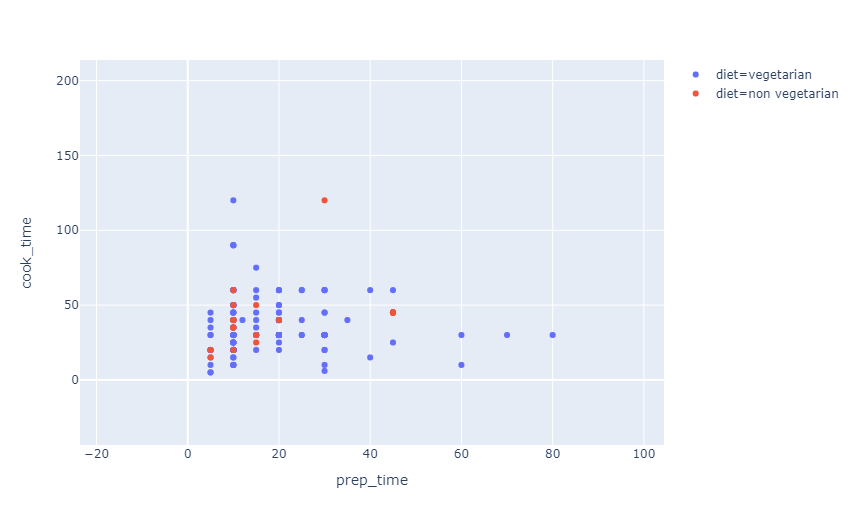

Here I thought there are lot of values in between 10-90 so I selected that part of area to get more information. This bascically a zoomed in version of the same graph.

**Conclusions drawn:**



1.   Prepartion time is usually less than cooking time.
2.   Most of vegetarian food is seen in this section which means it takes less time to cook vegetarian food than to cook non-vegetarian food.


3.   There is one exception in vegetarian food which point sits top of the graph which has less preparation time but a long cooking time.
   







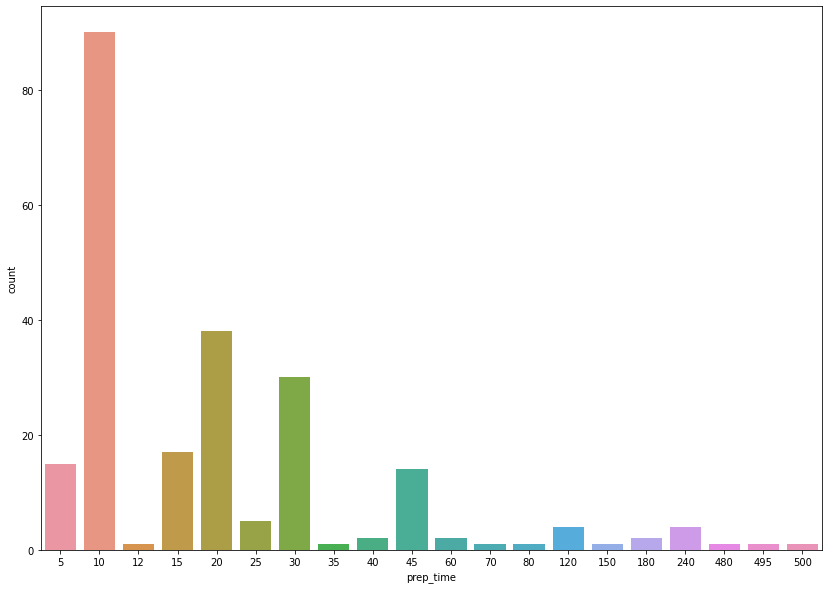

In [685]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.prep_time)

In [686]:
px.scatter(df,x='prep_time',y='cook_time',color='diet',marginal_y="violin",
           marginal_x="box", trendline="ols",template='simple_white')

In [687]:
px.scatter(df,x=df.prep_time,y=df.region,color=df.course,opacity=0.5)

**Conclusion drawn:**

1.   Here we can see that North-East's famous food falls under main course category.
2.   Western region has more of famous snacks as I'm from westen I can say about it too.
1.   Northern region has more famous main course dishes.
2.  South has equal cateogries of famous food items.

For more clear analysis of this graph, select the particular area of chart for zoomed in axis as I have done below.....

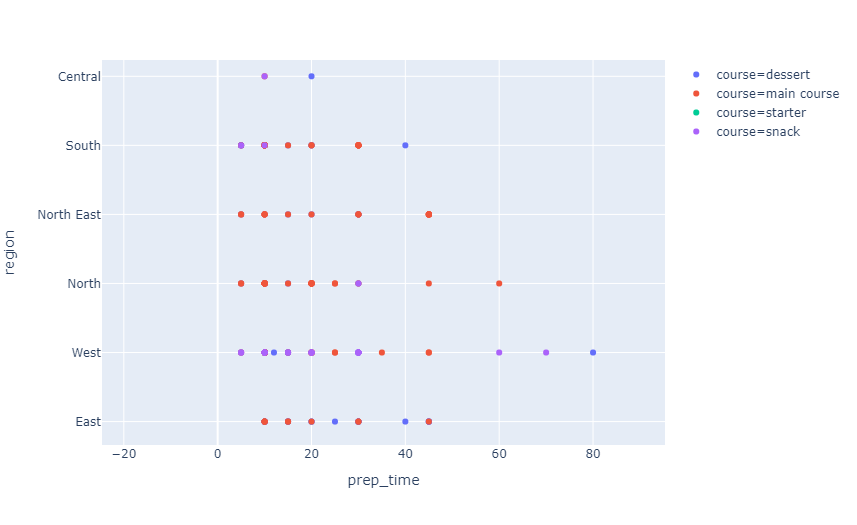




In [688]:
px.scatter(df,x=df.prep_time,y=df.course,color=df.flavor_profile,opacity=0.5)

**Conclusion:**

1.   Preparation time of all kinds food is less and there are some exceptionals which we can see in the above graph.
2.   We can see more detailed information about preparation time once we zoom in as you can see in the below graph...[**NOTE:** This graph is not interactive as it is a screen shot, you can adjust the zoom in and out in above code output.]
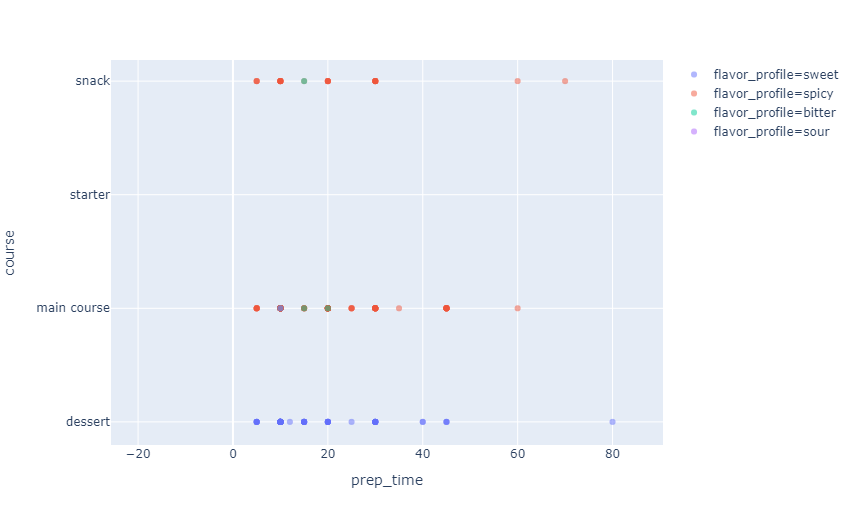



In [689]:
px.scatter(df,x=df.cook_time,y=df.course,color=df.flavor_profile,opacity=0.5)

**Conclusion:**

1.   Here the cooking time of all types almost is between 15-90.
2.   To look for detailed information, zoom in the graph.

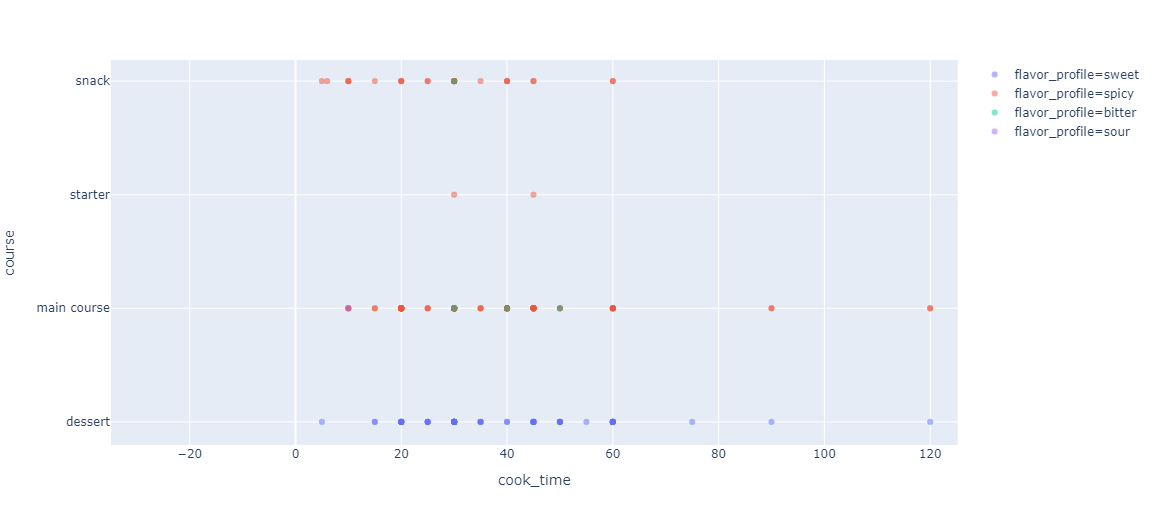



In [690]:
px.scatter(df,x=df.flavor_profile,y=df.course,color=df.diet,opacity=0.2)

**Conclusion:**

1.   Desert is always sweet and vegetarian as we all know.   
2.   Less variety of main course is sweet and vegetarian.
1.   Most of the main course varieties are spicy and non-vegetarian.
2.   Snacks are mainly spicy and and vegetarian.
1.   Hardly any main course and starter are bitter and sour.







In [691]:
px.bar(df,x=df.name,y=df.region,color=df.course)

**Conclusion:**

1.   Most famous items are from western and eastern region




In [692]:
df['Region ID']=np.nan

In [693]:
df

name  ... Region ID
0                      Balu shahi  ...       NaN
1                          Boondi  ...       NaN
2                  Gajar ka halwa  ...       NaN
3                          Ghevar  ...       NaN
4                     Gulab jamun  ...       NaN
5                          Imarti  ...       NaN
6                          Jalebi  ...       NaN
8                        Kalakand  ...       NaN
11                          Lassi  ...       NaN
13                          Petha  ...       NaN
14                         Phirni  ...       NaN
15                          Rabri  ...       NaN
16                         Sheera  ...       NaN
17                        Singori  ...       NaN
18                    Sohan halwa  ...       NaN
20                  Chhena jalebi  ...       NaN
22                    Chhena poda  ...       NaN
23                      Cham cham  ...       NaN
24                    Kheer sagar  ...       NaN
25                       Ledikeni  ...       NaN
26                       Lyangcha  ...       NaN
27                        Malapua  ...       NaN
28                       Mihidana  ...       NaN
29                      Misti doi  ...       NaN
30                         Pantua  ...       NaN
31                          Pithe  ...       NaN
32                       Rasabali  ...       NaN
33                      Ras malai  ...       NaN
34                       Rasgulla  ...       NaN
35                        Sandesh  ...       NaN
36                      Adhirasam  ...       NaN
37                        Ariselu  ...       NaN
38                   Bandar laddu  ...       NaN
39                         Chikki  ...       NaN
40                  Dharwad pedha  ...       NaN
41               Double ka meetha  ...       NaN
42                        Gavvalu  ...       NaN
43                 Kakinada khaja  ...       NaN
44                Kuzhi paniyaram  ...       NaN
45                     Mysore pak  ...       NaN
46                 Obbattu holige  ...       NaN
47                  Palathalikalu  ...       NaN
48                       Poornalu  ...       NaN
49                         Pongal  ...       NaN
50                   Pootharekulu  ...       NaN
51               Qubani ka meetha  ...       NaN
52                    Sheer korma  ...       NaN
53                     Unni Appam  ...       NaN
54                      Kajjikaya  ...       NaN
55                         Anarsa  ...       NaN
56                        Basundi  ...       NaN
57                        Dhondas  ...       NaN
58                       Doodhpak  ...       NaN
59                    Mahim halwa  ...       NaN
60                          Modak  ...       NaN
61                    Shankarpali  ...       NaN
62                      Shrikhand  ...       NaN
63                     Sutar feni  ...       NaN
64                     Maach Jhol  ...       NaN
66                 Chak Hao Kheer  ...       NaN
67                          Galho  ...       NaN
68                      Aloo gobi  ...       NaN
69                     Aloo tikki  ...       NaN
70                     Aloo matar  ...       NaN
71                     Aloo methi  ...       NaN
72              Aloo shimla mirch  ...       NaN
73                        Bhatura  ...       NaN
74                  Bhindi masala  ...       NaN
75                        Biryani  ...       NaN
76                 Butter chicken  ...       NaN
77                   Chana masala  ...       NaN
78                        Chapati  ...       NaN
79                 Chicken razala  ...       NaN
80           Chicken Tikka masala  ...       NaN
81                  Chicken Tikka  ...       NaN
82                  Chole bhature  ...       NaN
83              Daal baati churma  ...       NaN
84                      Daal puri  ...       NaN
85                   Dal makhani   ...       NaN
86                      Dal tadka  ...       NaN
87                       Dum aloo  ...       NaN
88         

In [694]:
df.loc[:,['region']]

region
0          East
1          West
2         North
3          West
4          East
5          East
6         North
8          East
11        North
13        North
14         East
15        North
16         West
17        North
18        North
20         East
22         East
23         East
24         East
25         East
26   North East
27        North
28         East
29         East
30         East
31   North East
32         East
33         East
34         East
35         East
36         East
37        South
38        South
39         West
40        South
41        South
42        South
43        South
44        South
45        South
46        South
47        South
48        South
49        South
50        South
51        South
52        South
53        South
54        South
55         West
56         West
57         West
58         West
59         West
60         West
61         West
62         West
63         West
64   North East
66   North East
67   North East
68        North
69        North
70        North
71        North
72        North
73        North
74        North
75        South
76        North
77        North
78         West
79         East
80        North
81        North
82        North
83         West
84         East
85        North
86        North
87        North
88         West
89      Central
90        North
91        North
92        North
93        North
95        North
97        North
99        North
100       North
101       North
102       North
103       North
104       North
105       North
106       North
107       North
108       North
110        West
112       North
113        West
114       North
116       North
118       North
119       North
120       South
121       North
122       North
123       North
124       South
125       South
126       South
127       South
129       South
131       South
133       South
135       South
136       South
137       South
138       South
139       South
140       South
141       South
142       South
143       South
146       South
147       South
150       South
151       South
153       South
155       South
157       South
159       South
160       South
163       South
165        West
166        West
168        West
169        West
170        West
171        West
173        West
174        West
175        West
176        West
177        West
178        West
179        West
180        West
181        West
182        West
183        West
184        West
186        West
188        West
189        West
190        West
191        West
192        West
193        West
194     Central
195        West
196        West
197        West
198        West
199        West
200        West
201        West
202        West
203        West
204        West
205        West
206        West
207        West
208        West
209        West
210        West
211        West
212        West
214        West
215        West
217        West
218        West
219        West
221  North East
222  North East
224        East
225  North East
226  North East
228  North East
232        East
233        East
235  North East
236        East
243        East
245  North East
247        East
249        East
250  North East
251        West
253     Central
19         West
21         East
132       South
134       South
148       South
152       South
185        West
187        West
213        West
216        West
220        East
227  North East
230  North East
234  North East
238  North East
244        East
246  North East
252       North
254        West
65   North East
167        West
172        West
223  North East
229  North East
237        East
239  North East
240  North East
241  North East
242  North East

In [695]:
df.region.value_counts()

West          75
South         49
North         48
East          31
North East    25
Central        3
Name: region, dtype: int64

In [696]:
df['Region_ID']=df.region.replace({"North":1,"North East":2,"East":3,"South":4,"West":5,"Central":6})

In [697]:
df

name  ... Region_ID
0                      Balu shahi  ...         3
1                          Boondi  ...         5
2                  Gajar ka halwa  ...         1
3                          Ghevar  ...         5
4                     Gulab jamun  ...         3
5                          Imarti  ...         3
6                          Jalebi  ...         1
8                        Kalakand  ...         3
11                          Lassi  ...         1
13                          Petha  ...         1
14                         Phirni  ...         3
15                          Rabri  ...         1
16                         Sheera  ...         5
17                        Singori  ...         1
18                    Sohan halwa  ...         1
20                  Chhena jalebi  ...         3
22                    Chhena poda  ...         3
23                      Cham cham  ...         3
24                    Kheer sagar  ...         3
25                       Ledikeni  ...         3
26                       Lyangcha  ...         2
27                        Malapua  ...         1
28                       Mihidana  ...         3
29                      Misti doi  ...         3
30                         Pantua  ...         3
31                          Pithe  ...         2
32                       Rasabali  ...         3
33                      Ras malai  ...         3
34                       Rasgulla  ...         3
35                        Sandesh  ...         3
36                      Adhirasam  ...         3
37                        Ariselu  ...         4
38                   Bandar laddu  ...         4
39                         Chikki  ...         5
40                  Dharwad pedha  ...         4
41               Double ka meetha  ...         4
42                        Gavvalu  ...         4
43                 Kakinada khaja  ...         4
44                Kuzhi paniyaram  ...         4
45                     Mysore pak  ...         4
46                 Obbattu holige  ...         4
47                  Palathalikalu  ...         4
48                       Poornalu  ...         4
49                         Pongal  ...         4
50                   Pootharekulu  ...         4
51               Qubani ka meetha  ...         4
52                    Sheer korma  ...         4
53                     Unni Appam  ...         4
54                      Kajjikaya  ...         4
55                         Anarsa  ...         5
56                        Basundi  ...         5
57                        Dhondas  ...         5
58                       Doodhpak  ...         5
59                    Mahim halwa  ...         5
60                          Modak  ...         5
61                    Shankarpali  ...         5
62                      Shrikhand  ...         5
63                     Sutar feni  ...         5
64                     Maach Jhol  ...         2
66                 Chak Hao Kheer  ...         2
67                          Galho  ...         2
68                      Aloo gobi  ...         1
69                     Aloo tikki  ...         1
70                     Aloo matar  ...         1
71                     Aloo methi  ...         1
72              Aloo shimla mirch  ...         1
73                        Bhatura  ...         1
74                  Bhindi masala  ...         1
75                        Biryani  ...         4
76                 Butter chicken  ...         1
77                   Chana masala  ...         1
78                        Chapati  ...         5
79                 Chicken razala  ...         3
80           Chicken Tikka masala  ...         1
81                  Chicken Tikka  ...         1
82                  Chole bhature  ...         1
83              Daal baati churma  ...         5
84                      Daal puri  ...         3
85                   Dal makhani   ...         1
86                      Dal tadka  ...         1
87                       Dum aloo  ...         1
88         

Here I had mistakenly created two regional ID's so I will have to drop one of them.

In [698]:
df.drop(['Region ID'],axis=1,inplace=True)

In [699]:
df

name  ... Region_ID
0                      Balu shahi  ...         3
1                          Boondi  ...         5
2                  Gajar ka halwa  ...         1
3                          Ghevar  ...         5
4                     Gulab jamun  ...         3
5                          Imarti  ...         3
6                          Jalebi  ...         1
8                        Kalakand  ...         3
11                          Lassi  ...         1
13                          Petha  ...         1
14                         Phirni  ...         3
15                          Rabri  ...         1
16                         Sheera  ...         5
17                        Singori  ...         1
18                    Sohan halwa  ...         1
20                  Chhena jalebi  ...         3
22                    Chhena poda  ...         3
23                      Cham cham  ...         3
24                    Kheer sagar  ...         3
25                       Ledikeni  ...         3
26                       Lyangcha  ...         2
27                        Malapua  ...         1
28                       Mihidana  ...         3
29                      Misti doi  ...         3
30                         Pantua  ...         3
31                          Pithe  ...         2
32                       Rasabali  ...         3
33                      Ras malai  ...         3
34                       Rasgulla  ...         3
35                        Sandesh  ...         3
36                      Adhirasam  ...         3
37                        Ariselu  ...         4
38                   Bandar laddu  ...         4
39                         Chikki  ...         5
40                  Dharwad pedha  ...         4
41               Double ka meetha  ...         4
42                        Gavvalu  ...         4
43                 Kakinada khaja  ...         4
44                Kuzhi paniyaram  ...         4
45                     Mysore pak  ...         4
46                 Obbattu holige  ...         4
47                  Palathalikalu  ...         4
48                       Poornalu  ...         4
49                         Pongal  ...         4
50                   Pootharekulu  ...         4
51               Qubani ka meetha  ...         4
52                    Sheer korma  ...         4
53                     Unni Appam  ...         4
54                      Kajjikaya  ...         4
55                         Anarsa  ...         5
56                        Basundi  ...         5
57                        Dhondas  ...         5
58                       Doodhpak  ...         5
59                    Mahim halwa  ...         5
60                          Modak  ...         5
61                    Shankarpali  ...         5
62                      Shrikhand  ...         5
63                     Sutar feni  ...         5
64                     Maach Jhol  ...         2
66                 Chak Hao Kheer  ...         2
67                          Galho  ...         2
68                      Aloo gobi  ...         1
69                     Aloo tikki  ...         1
70                     Aloo matar  ...         1
71                     Aloo methi  ...         1
72              Aloo shimla mirch  ...         1
73                        Bhatura  ...         1
74                  Bhindi masala  ...         1
75                        Biryani  ...         4
76                 Butter chicken  ...         1
77                   Chana masala  ...         1
78                        Chapati  ...         5
79                 Chicken razala  ...         3
80           Chicken Tikka masala  ...         1
81                  Chicken Tikka  ...         1
82                  Chole bhature  ...         1
83              Daal baati churma  ...         5
84                      Daal puri  ...         3
85                   Dal makhani   ...         1
86                      Dal tadka  ...         1
87                       Dum aloo  ...         1
88         

Lets check if the there is some problem with the new feature and if not then we will move forward.
Here I have added a new feature because I wanted to show parallel coordinates graph because it if one of the most convincing graphs I have ever seen.

In [700]:
df.Region_ID.value_counts()

5    75
4    49
1    48
3    31
2    25
6     3
Name: Region_ID, dtype: int64

In [701]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)


In [702]:
df.flavor_profile.value_counts()

spicy     144
sweet      82
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [703]:
df['Flavor_Profile_ID']=df.flavor_profile.replace({'spicy':4,'sweet':3,'bitter':2,'sour':1})

In [704]:
df

name  ... Flavor_Profile_ID
0                      Balu shahi  ...                 3
1                          Boondi  ...                 3
2                  Gajar ka halwa  ...                 3
3                          Ghevar  ...                 3
4                     Gulab jamun  ...                 3
5                          Imarti  ...                 3
6                          Jalebi  ...                 3
8                        Kalakand  ...                 3
11                          Lassi  ...                 3
13                          Petha  ...                 3
14                         Phirni  ...                 3
15                          Rabri  ...                 3
16                         Sheera  ...                 3
17                        Singori  ...                 3
18                    Sohan halwa  ...                 3
20                  Chhena jalebi  ...                 3
22                    Chhena poda  ...                 3
23                      Cham cham  ...                 3
24                    Kheer sagar  ...                 3
25                       Ledikeni  ...                 3
26                       Lyangcha  ...                 3
27                        Malapua  ...                 3
28                       Mihidana  ...                 3
29                      Misti doi  ...                 3
30                         Pantua  ...                 3
31                          Pithe  ...                 3
32                       Rasabali  ...                 3
33                      Ras malai  ...                 3
34                       Rasgulla  ...                 3
35                        Sandesh  ...                 3
36                      Adhirasam  ...                 3
37                        Ariselu  ...                 3
38                   Bandar laddu  ...                 3
39                         Chikki  ...                 3
40                  Dharwad pedha  ...                 3
41               Double ka meetha  ...                 3
42                        Gavvalu  ...                 3
43                 Kakinada khaja  ...                 3
44                Kuzhi paniyaram  ...                 3
45                     Mysore pak  ...                 3
46                 Obbattu holige  ...                 3
47                  Palathalikalu  ...                 3
48                       Poornalu  ...                 3
49                         Pongal  ...                 3
50                   Pootharekulu  ...                 3
51               Qubani ka meetha  ...                 3
52                    Sheer korma  ...                 3
53                     Unni Appam  ...                 3
54                      Kajjikaya  ...                 3
55                         Anarsa  ...                 3
56                        Basundi  ...                 3
57                        Dhondas  ...                 3
58                       Doodhpak  ...                 3
59                    Mahim halwa  ...                 3
60                          Modak  ...                 3
61                    Shankarpali  ...                 3
62                      Shrikhand  ...                 3
63                     Sutar feni  ...                 3
64                     Maach Jhol  ...                 4
66                 Chak Hao Kheer  ...                 3
67                          Galho  ...                 4
68                      Aloo gobi  ...                 4
69                     Aloo tikki  ...                 4
70                     Aloo matar  ...                 4
71                     Aloo methi  ...                 2
72              Aloo shimla mirch  ...                 4
73                        Bhatura  ...                 4
74                  Bhindi masala  ...                 4
75                        Biryani  ...                 4
76                 Butter chicken  ... 

In [705]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','Flavor_Profile_ID'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)


Lets add more values to it.
I'm adding feature ID's because this graph only takes numerical values.

In [706]:
df.course.value_counts()

main course    120
dessert         79
snack           30
starter          2
Name: course, dtype: int64

In [707]:
df['Course_ID']=df.course.replace({'main course':4,'dessert':3,'snack':2,'starter':1})

In [708]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','Flavor_Profile_ID','Course_ID'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

In [709]:
df.state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Goa                 3
Bihar               3
Jammu & Kashmir     2
Manipur             2
Madhya Pradesh      2
Uttarakhand         1
Haryana             1
Nagaland            1
NCT of Delhi        1
Tripura             1
Chhattisgarh        1
Name: state, dtype: int64

In [710]:
df['State_ID']=df.state.replace(df.state.value_counts())

It was tough for me to go through each of the unique value in the state column and assign it a particular number, so I chaged it with the number of times its values is observed in the data.

In [711]:
df

name  ... State_ID
0                      Balu shahi  ...       24
1                          Boondi  ...        6
2                  Gajar ka halwa  ...       32
3                          Ghevar  ...        6
4                     Gulab jamun  ...       24
5                          Imarti  ...       24
6                          Jalebi  ...        9
8                        Kalakand  ...       24
11                          Lassi  ...       32
13                          Petha  ...        9
14                         Phirni  ...        7
15                          Rabri  ...        9
16                         Sheera  ...       30
17                        Singori  ...        1
18                    Sohan halwa  ...        9
20                  Chhena jalebi  ...        7
22                    Chhena poda  ...        7
23                      Cham cham  ...       24
24                    Kheer sagar  ...        7
25                       Ledikeni  ...       24
26                       Lyangcha  ...       21
27                        Malapua  ...        3
28                       Mihidana  ...       24
29                      Misti doi  ...       24
30                         Pantua  ...       24
31                          Pithe  ...       21
32                       Rasabali  ...        7
33                      Ras malai  ...       24
34                       Rasgulla  ...       24
35                        Sandesh  ...       24
36                      Adhirasam  ...       24
37                        Ariselu  ...       10
38                   Bandar laddu  ...       10
39                         Chikki  ...       30
40                  Dharwad pedha  ...        6
41               Double ka meetha  ...        5
42                        Gavvalu  ...       10
43                 Kakinada khaja  ...       10
44                Kuzhi paniyaram  ...        8
45                     Mysore pak  ...        6
46                 Obbattu holige  ...        6
47                  Palathalikalu  ...       10
48                       Poornalu  ...       10
49                         Pongal  ...       20
50                   Pootharekulu  ...       10
51               Qubani ka meetha  ...        5
52                    Sheer korma  ...        5
53                     Unni Appam  ...       20
54                      Kajjikaya  ...       10
55                         Anarsa  ...       30
56                        Basundi  ...       35
57                        Dhondas  ...       30
58                       Doodhpak  ...       35
59                    Mahim halwa  ...       30
60                          Modak  ...       30
61                    Shankarpali  ...       30
62                      Shrikhand  ...       30
63                     Sutar feni  ...       30
64                     Maach Jhol  ...       21
66                 Chak Hao Kheer  ...        2
67                          Galho  ...        1
68                      Aloo gobi  ...       32
69                     Aloo tikki  ...       32
70                     Aloo matar  ...       32
71                     Aloo methi  ...       32
72              Aloo shimla mirch  ...       32
73                        Bhatura  ...       32
74                  Bhindi masala  ...       32
75                        Biryani  ...        5
76                 Butter chicken  ...        1
77                   Chana masala  ...       32
78                        Chapati  ...       30
79                 Chicken razala  ...       24
80           Chicken Tikka masala  ...       32
81                  Chicken Tikka  ...       32
82                  Chole bhature  ...       32
83              Daal baati churma  ...        6
84                      Daal puri  ...       24
85                   Dal makhani   ...       32
86                      Dal tadka  ...       32
87                       Dum aloo  ...        2
88                           Poha  ...       30
89                           Fara  ...       

In [712]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','State_ID','Flavor_Profile_ID','Course_ID'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

In [713]:
df['Diet_ID']=df.diet.replace({'vegetarian':1,'non vegetarian':2})

In [714]:
df.Diet_ID.value_counts()

1    202
2     29
Name: Diet_ID, dtype: int64

In [715]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','State_ID','Flavor_Profile_ID','Course_ID','Diet_ID'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

Here the whole data is shown, I know it looks too sophisticated, but this graph  has lot to say.

Here down see what I have done,Eg: If I'm on my vacation and I have time to cook food, but I don't want time to exceed 300 minutes and not less than 150 minutes so I will select the time between 150-300 in Total time and I wanna eat vegetarian so I select 1 in other Diet_ID and it will display it all.

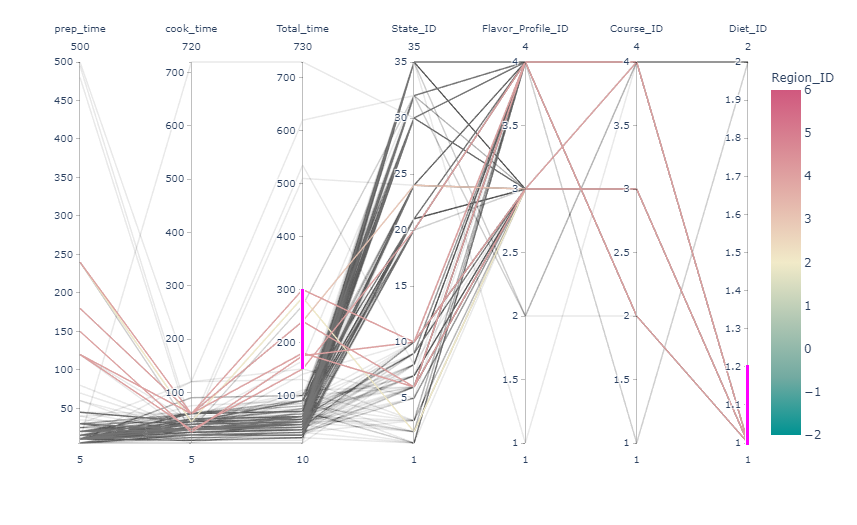



In [716]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','State_ID','Flavor_Profile_ID','Course_ID','Diet_ID'],
                              color_continuous_scale=px.colors.sequential.Inferno,
                              color_continuous_midpoint=2)

Just changed the colors in the graph in the upper code.

In [717]:
px.scatter(df, x="prep_time", y="cook_time", animation_frame="diet", animation_group="name",
            color="flavor_profile", hover_name="name", facet_col="region",
           log_x=True,log_y=True, size_max=45, range_x=[100,700], range_y=[25,90])

Here you can see each of the items with cool animation provided below.
You can adjust the X and Y axis to see different times and also hover on the dots for name of he dish as I have done below.

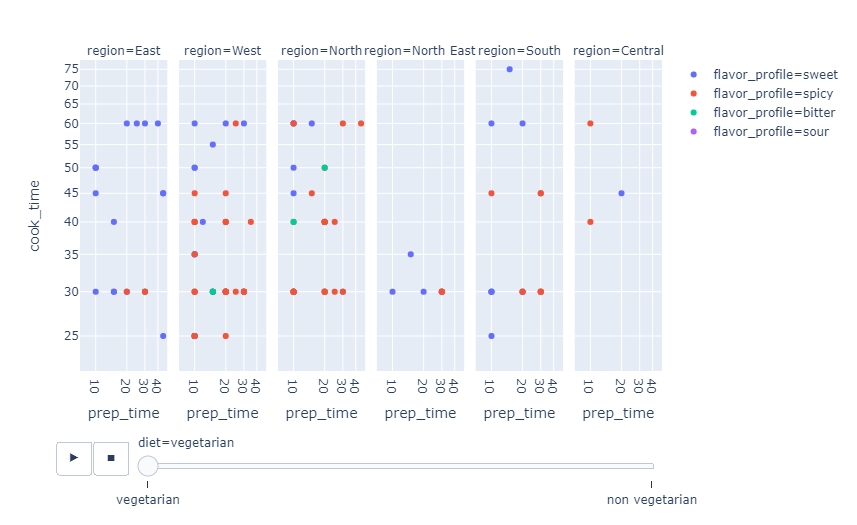



In [718]:
px.pie(df, values=df.diet.replace({'vegetarian':1,'non vegetarian':1}), names=df.diet)

In [719]:
px.histogram(df, x="Total_time", y="prep_time", color="diet", hover_data=df.columns)

The Above graph shows clear relation between the name of famous dishes from each region and course and total time taken by it.

In [720]:
df.drop(['State_ID','Course_ID','Region_ID','Flavor_Profile_ID','Diet_ID'],axis=1,inplace=True)

In [721]:
px.strip(df, x="Total_time", y="region", orientation="h", color="course",hover_data=df.columns)

**ConClusion:**

1.   In Western region Maharashtra's famous dish,named shrikhand, a desert is consuming more time for its final output. 
2.   In Eastern region, Misti doi, a sweet from west Bengal takes most time.
1.   In Northern region,Pindi channa a famous dish takes the most time for its final output.
2.   In North-Eastern region, Manipurs famous sweet 





In [722]:
px.density_heatmap(df, x="cook_time", y="prep_time", marginal_x="rug", marginal_y="histogram")

In [724]:
px.scatter_3d(df, x="prep_time", y="cook_time", z="Total_time", color="course",  hover_name="name",
                   color_discrete_map = {"prep_time": "blue", "cook_time": "green", "Total_time":"red"})

Hover your cursor on each point to know about the dishes and time need to cook them!!

No doubt to say a last point is that Indians like to eat much spicy food as most of the dishes above have a some sought of spicy flavor in it except the desert!!

All Conclusions drawn are wriiten after each graphs which will help us for understanding data well!!

Thank You!!